**Data Mining and Machine Learning**

# Machine Learning I

Jan Riebling, **Universität Wuppertal**

In [1]:
#install.packages(c('topicmodels', 'reshape2', 'caTools', 'ROCR'))
    
# Loading packages
library(caTools)
library(ROCR) 
library(topicmodels)
library(tidyverse)
library(tidytext)

── Attaching packages ──────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Grundlagen des Machine Learnings

## Machine Learning

Maschinelles Lernen bezeichnet eine Vielzahl von Verfahren, die auf Mustererkennung und die Klassifikation von Daten abzielen.

## Arten des Lernens

* **Unsupervised learning**: Klassifikationen von Daten ohne vorherige Informationen welche Klassen korrekt sein könnten (ohne Überwachung des Modells). 
* **Supervised learning**: Klassifiaktion von Daten durch Training eines Modells mit bereits bekannten Daten.

## Workflow

1. Datensatz zusammenstellen:
    * UL und SL: Datensatz der Eigenschaften (*features*).
    * Nur SL: Vektor der Zielvariable (*target*).
        * Trennung in Trainings- und Testdaten.
2. Modell trainieren klassifizieren.
3. Modell überprüfen:
    * Modell auf die zurückgehaltenen Testdaten anwenden und Fehler identifizieren.
4. (Klassifizierer implementieren).

# Unsupervised Learning

## Vorgehen und Ziel

Klassifikation oder dimensionelle Reduktion von Daten mit dem Ziel der Mustererkennung.

## Topic Models

Im Bereich der quantitativen Textanalyse eingesetzte Verfahren zur unüberwachten Extraktion von Themen aus Texten. Der Begriff bezieht sich auch oft auf die *Latent Dirichlet Allocation (LDA)* als einem der bekanntesten Verfahren in diesem Bereich. In R wird dieses und direkt damit verwandte Verfahren durch das Paket `topicmodels` bereitgestellt. Siehe auch diese [Vignette](https://cran.r-project.org/web/packages/topicmodels/vignettes/topicmodels.pdf) und insbesondere [„Text Mining with R: A Tidy Approach“](https://www.tidytextmining.com/topicmodeling.html#latent-dirichlet-allocation).

In [29]:
library(topicmodels)

In [3]:
ttl_df <- read_delim('../data/GesetzeBayernTTL.tsv', col_names=c('DocID', 'Token', 'Tag', 'Lemma'))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 730760 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): DocID, Token, Tag, Lemma

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
## Verteilung der Tags

ttl_df %>%
  count(Tag, sort=TRUE)

Tag,n
<chr>,<int>
NN,205760
ART,81944
APPR,59533
CARD,55396
ADJA,46629
$.,35523
$(,29852
"$,",28581
KON,27789


## Document Term Matrix

In [22]:
gesetzebay_dtm <- ttl_df %>%
  filter(Tag %in% c('NN', 'NE', 'ADJA', 'ADV', 'ADJD' ), Lemma != '<unknown>') %>%
  count(DocID, Lemma, sort=TRUE) %>%
  cast_dtm(DocID, Lemma, n)

gesetzebay_dtm

<<DocumentTermMatrix (documents: 99, terms: 14958)>>
Non-/sparse entries: 51784/1429058
Sparsity           : 97%
Maximal term length: 35
Weighting          : term frequency (tf)

## Topic Model

In [26]:
gbay_lda <- LDA(gesetzebay_dtm, k=4, control=list(seed = 1234))
gbay_lda

A LDA_VEM topic model with 4 topics.

## $\beta$ Werte

Die $\beta$ Werte geben die Wahrscheinlichkeit für ein Wort, bei zufälliger Ziehung, aus einem bestimmten Thema zu entstammen.

In [30]:
gbay_topics <- tidy(gbay_lda, matrix="beta")
gbay_topics

topic,term,beta
<int>,<chr>,<dbl>
1,Art.,2.447101e-02
2,Art.,4.019173e-03
3,Art.,3.956598e-02
4,Art.,3.302299e-05
1,Abs.,3.367748e-02
2,Abs.,7.027900e-03
3,Abs.,2.822412e-02
4,Abs.,4.988648e-03
1,Nummer,1.102004e-02


## Top 10

Worte pro Thema

In [31]:
gbay_top_terms <- gbay_topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 10) %>% 
  ungroup() %>%
  arrange(topic, -beta)

gbay_top_terms

topic,term,beta
<int>,<chr>,<dbl>
1,Abs.,0.033677476
1,§,0.027434566
1,Art.,0.024471009
1,Person,0.015800986
1,Satz,0.012284155
1,Nummer,0.011020042
1,auch,0.010230994
1,so,0.009920655
1,@card@,0.006727636


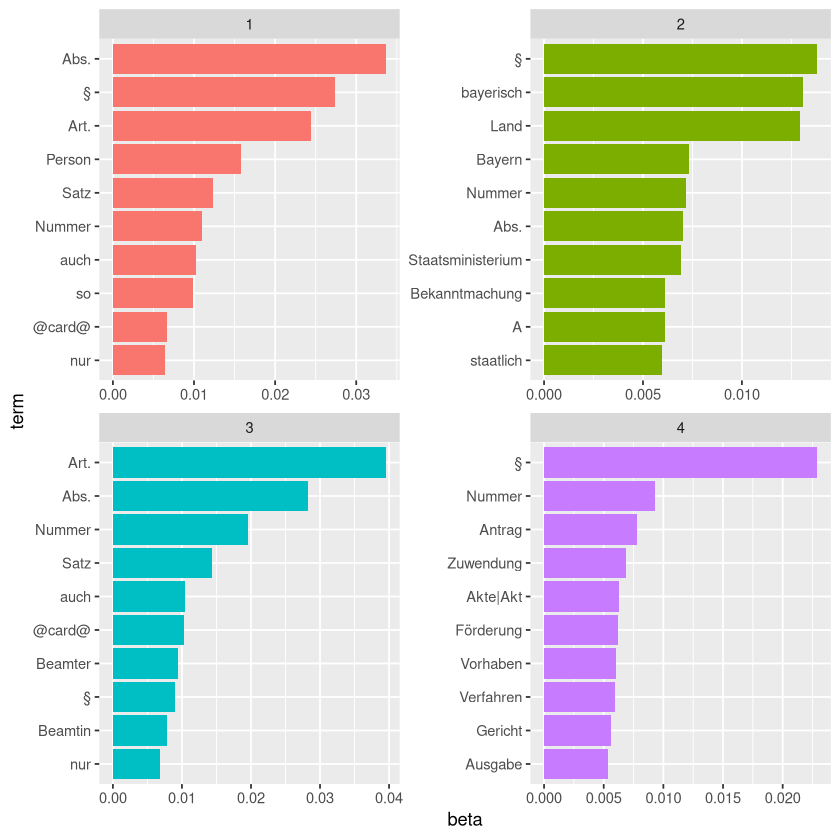

In [32]:
gbay_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

# Supervised Learning

## Vorgehen und Ziel

Die Zielvariablen (die Sorte im Iris-Beispiel) werden genutzt um ein Modell auf die Unterschiede in den Daten anzupassen (*trainieren*). Statistisch gesprochen nutzen wir die Zielvariablen als *abhängige Variablen* und die beobachteten Ausprägungen in den Daten als *unabhängige Variablen*. Ziel dieses Vorgehens ist es einen Klassifikator zu erzeugen, der neue Objekte aufgrund der bekannten Eigenschaften klassifizieren kann.

* [Machine Learning with R](https://www.geeksforgeeks.org/machine-learning-with-r/).
* [R for Statistical Learning](https://daviddalpiaz.github.io/r4sl/).

## Logistische Regression

Siehe [Beschreibung des Verfahrens](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) und [Dokumentation des scikit-Objekts](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression). Statt einer linearen Regressionsgerade wird eine logistische Funktion zur Schätzung des Zusammenhangs von unabhängigen und abhängiger Variablen verwendet. Im Bereich des maschinellen Lernens wird dieses Verfahren auch als Maximum Entropie Klassifikation bezeichnet.

## Vergleich von Regressionsverfahren

![Logistische vs. Lineare Regression.](../figures/LogisticRegression.svg)

## Beispiel: Sentiment Analysis

Ein Klassifikator der aus den Worten eines Textes auf die Konnotation (meist: positiv oder negativ) eines Textes schließen soll. Hier auf der Basis von Movie Reviews der IMDB. Kompletter Datensatz ist [hier](https://www.rdocumentation.org/packages/textdata/versions/0.4.4) erhältlich.

## Text zu Daten

Drei Schritte:

1. Tokenisierung.
2. Aufbereitung (Bsp. Entfernung von Stopwörtern).
3. Numerische Repräsentation.

Da die Transformation zu zeitaufwendig war und den Speicherbedarf dieses Rechners übersteigt, wird auf ein einfacheres Beispiel zurückgegriffen.

```R
text_df <- read_delim('../data/IMDBReviews.tsv')

data_df <- text_df %>%
  unnest_tokens(Token, RawText) %>%
  count(DocID, Token) %>%
  pivot_wider(DocID, names_from=Token, values_from=n, values_fill=0)

data_df <- merge(data_df, text_df %>% distinct(DocID, Sentiment), by='DocID')
```

In [2]:
data_df <- read_csv('../data/IMDBReviewsData.csv')

## DocID entfernen
data_df <- data_df[,-1]
## Sentiment als factor
data_df$Sentiment <- as.factor(data_df$Sentiment)

In [3]:
names_df <- read_csv('../data/Names.csv')
## Sex als kategoriale Variable
names_df$Sex <- as.factor(names_df$Sex)

Rows: 7944 Columns: 2
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): FirstName, Sex

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
data_df <- names_df %>%
  mutate(LastOne=str_to_lower(str_sub(FirstName, start=-1))) %>%
  count(FirstName, Sex, LastOne) %>%
  pivot_wider(names_from=LastOne, values_from=n, values_fill=0)

data_df

FirstName,Sex,r,n,l,e,y,i,t,m,⋯,g,c,x,j,w,b,z,u,v,p
<chr>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Aamir,male,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Aaron,male,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Abagael,female,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Abagail,female,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Abbe,female,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Abbey,female,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Abbey,male,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Abbi,female,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Abbie,female,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Aufsplitten in Test- und Trainingsdaten

Eine zentrale Technik des maschinellen Lernens ist der Test der Modellgüte anhand zurückgehaltener Daten (*holdout data*). Da in den zurückgehaltenen Testdaten ebenfalls die wahre Ausprägung der Zielvariablen bekannt ist, kann so die Vorhersagekraft des Klassifikators abgeschätzt werden. Dazu ist es notwendig Zufallsstichproben aus dem ursprünglichen Datensatz zu generieren.

In [30]:
set.seed(1234)
num_obs <- nrow(data_df)
index <- sample(num_obs, size=trunc(0.60 * num_obs))

train_df <- data_df[index,-1]
test_df <- data_df[-index,-1]

## Modell trainieren

In [31]:
logistic_model <- glm(Sex ~ ., 
                      data = train_df, 
                      family = "binomial")
#logistic_model

## Vorhersage auf Basis des Test-Datensatzes

Eine zentrale Besonderheit des maschinellen Lernens ist der Test der Vorhersage mit Daten, die **nicht** zum Training des Modells herangezogen wurden. Auf der Basis dieser Vorhersage können dann Metriken zur Einschätzung der Modellgüte berechnet werden.

In [44]:
prediction <- predict(logistic_model, 
                      test_df, 
                      type = "response") 

# Wahrscheinlichkeiten dichotomisieren
prediction <- as.factor(ifelse(prediction > 0.5, 'male', 'female'))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“Vorhersage durch Fit ohne vollen Rang mag täuschen”


## Korrespondenz mit zugrundeliegenden Fakten

Konfusions-Matrix:

| $\,$                   | Tatsächlich positiv                    | Tatsächlich negativ                    |
|------------------------|----------------------------------------|----------------------------------------|
| **Vorhersage positiv** | Wahres positiv, Power                  | Falsch positiv, Typ I, $\alpha$-Fehler |
| **Vorhersage negativ** | Falsch negativ, Typ II, $\beta$-Fehler | Wahres negativ                         |

In [50]:
table(prediction, test_df$Sex, dnn=c('prediction', 'truth'))

          truth
prediction female male
    female   1637  394
    male      362  785

## Formale Accuracy

Formale Beschreibung der Treffgenauigkeit:

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} = \frac{\sum \text{korrekte Klassifikationen}}{\sum \text{Stichprobengröße}}
$$

Hinzu kommt die *balanced accuracy* welche durch die Relativierung der wahr positiven und wahr negativen Vorhersagen mit der respektiven Stichprobengröße gebildet wird. Dies ist insbesondere im Fall binärer Klassifikatoren von Bedeutung. 

In [47]:
missing_classerr <- mean(prediction != test_df$Sex)
print(paste('Accuracy: ', 1 - missing_classerr))

[1] "Accuracy:  0.762114537444934"


## Präzision

Präzision (Precision) ist das Verhältnis der korrekten positiven Vorhersagen zu allen positiven Vorhersagen (inklusive Typ I Fehler).

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\sum \text{true positive}}{\sum \text{predicted positive}}
$$



## Recall

Recall oder Sensitivität ist eine Maßzahl für die relative Anzahl der korrekten positiven Schätzungen gegeben alle Schätzungen (einschließlich Falsch negativ und Typ II Fehler).

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{\sum \text{wahr positiv}}{\sum \text{tatsächlich positiv}}
$$

## F1-score

Der gewichtete Mittelwert von Präzision und Sensitivität.

# Anmerkungen zum maschinellen Lernen


## Probleme

* Data driven: Nähe zum p-hacking und effect mining.
* Undurchsichtigkeit: Bestimmte Verfahren machen es schwer bis unmöglich zu verstehen warum ein Modell konvergiert.
* GIGO: Datenqualität muss im jeweiligen Einzelfall bewertet werden..
* Täuschend einfach.

## A chance  for social science?

> To summarize, the claim that prediction is a necessary (but not sufficient) feature of causal explanation is consistent with a view of causality that is almost universally accepted by sociologists—even sociologists who have explicitly denied the necessity of prediction. The resolution of the apparent conflict is that prediction must be defined suitably—that is, in the broad sense of out-of-sample testing, allowing both for probabilistic predictions and for predictions about stylized facts or patterns of outcomes. [...] Although the details would differ depending on the type of explanation in question, in all cases the procedure would be roughly: (1) construct a “model” based on analysis of cases (A, B, C, ...); (2) deploy the model to make a prediction
about case X, which is in the same class as (A, B, C, ...) but was not used to inform the model itself; (3) check the prediction. (Watts 2014, 340)


## Only curve-fitting?

> As much as I look into what’s being done with deep learning, I see they’re all stuck there on the level of associations. Curve fitting. That sounds like sacrilege, to say that all the impressive achievements of deep learning amount to just fitting a curve to data. From the point of view of the mathematical hierarchy, no matter how skillfully you manipulate the data and what you read into the data when you manipulate it, it’s still a curve-fitting exercise, albeit complex and nontrivial. (Judea Pearl, [“To Build Truly Intelligent Machines, Teach Them Cause and Effect”](https://www.quantamagazine.org/to-build-truly-intelligent-machines-teach-them-cause-and-effect-20180515/))

# References

* Watts, Duncan J. 2014. “Common Sense and Sociological Explanations.” American Journal of Sociology 120 (2): 313–351.
